In [2]:
from IPython.core.display import display, HTML
display(HTML('<style>.container{width:80%!important;}</style>'))

In [3]:
# 数値計算やデータフレーム操作に関するライブラリをインポートする
import numpy as np
import pandas as pd
# URL によるリソースへのアクセスを提供するライブラリをインポートする。
import urllib.request 
# 図やグラフを図示するためのライブラリをインポートする。
from matplotlib import pyplot
from mpl_toolkits.mplot3d import Axes3D
from scipy import genfromtxt
%matplotlib inline
import sklearn #機械学習のライブラリ
from sklearn.decomposition import PCA #主成分分析器

In [4]:
df=pd.read_csv( 'http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv ',sep=';')

In [5]:
print(df)
df = df.values
df

      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4             0.700         0.00             1.9      0.076   
1               7.8             0.880         0.00             2.6      0.098   
2               7.8             0.760         0.04             2.3      0.092   
3              11.2             0.280         0.56             1.9      0.075   
4               7.4             0.700         0.00             1.9      0.076   
5               7.4             0.660         0.00             1.8      0.075   
6               7.9             0.600         0.06             1.6      0.069   
7               7.3             0.650         0.00             1.2      0.065   
8               7.8             0.580         0.02             2.0      0.073   
9               7.5             0.500         0.36             6.1      0.071   
10              6.7             0.580         0.08             1.8      0.097   
11              7.5         

array([[ 7.4  ,  0.7  ,  0.   , ...,  0.56 ,  9.4  ,  5.   ],
       [ 7.8  ,  0.88 ,  0.   , ...,  0.68 ,  9.8  ,  5.   ],
       [ 7.8  ,  0.76 ,  0.04 , ...,  0.65 ,  9.8  ,  5.   ],
       ...,
       [ 6.3  ,  0.51 ,  0.13 , ...,  0.75 , 11.   ,  6.   ],
       [ 5.9  ,  0.645,  0.12 , ...,  0.71 , 10.2  ,  5.   ],
       [ 6.   ,  0.31 ,  0.47 , ...,  0.66 , 11.   ,  6.   ]])

In [6]:
pd.DataFrame(pd.Series(df.ravel()).describe()).transpose()

,count,mean,std,min,25%,50%,75%,max
0,19188.0,7.926036,16.031427,0.0,0.59,3.12,8.9,289.0


In [7]:
# 行列の標準化
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler().fit(df) #平均0、分散1に変換
dfs = scaler.transform(df)

pd.DataFrame(pd.Series(dfs.ravel()).describe()).transpose()

,count,mean,std,min,25%,50%,75%,max
0,19188.0,2.138047e-15,1.000026,-3.700401,-0.687258,-0.16627,0.450848,11.127035


In [8]:
#主成分分析の実行
#pca = PCA(n_components=2)
#pca.fit(dfs)
pca = PCA(n_components=3).fit(df)
dfs = pca.transform(df)
print(df)

[[ 7.4    0.7    0.    ...  0.56   9.4    5.   ]
 [ 7.8    0.88   0.    ...  0.68   9.8    5.   ]
 [ 7.8    0.76   0.04  ...  0.65   9.8    5.   ]
 ...
 [ 6.3    0.51   0.13  ...  0.75  11.     6.   ]
 [ 5.9    0.645  0.12  ...  0.71  10.2    5.   ]
 [ 6.     0.31   0.47  ...  0.66  11.     6.   ]]


In [9]:
print(pca.explained_variance_ratio_)

[0.94607951 0.04834835 0.00259599]


In [10]:
print(pca.components_)

[[-6.13296554e-03  3.84670318e-04  1.70762384e-04  8.64864277e-03
   6.37476516e-05  2.18852809e-01  9.75669835e-01  3.72590009e-06
  -2.67974074e-04  2.23244233e-04 -6.35985376e-03 -4.31953676e-03]
 [-2.38646792e-02 -2.02021707e-03 -3.02675912e-03  1.11453593e-02
  -2.37525597e-04  9.75212313e-01 -2.18850408e-01 -2.50439091e-05
   3.26939011e-03  6.25945868e-04  1.46377527e-02  1.15350784e-02]
 [ 9.51200639e-01 -2.62402333e-02  7.42538455e-02  2.81876995e-01
   2.80220910e-03  1.99910682e-02 -9.82959404e-04  7.64213504e-04
  -5.84500955e-02  1.82329377e-02 -3.65813011e-02  6.37528799e-02]]


## 標準化なし

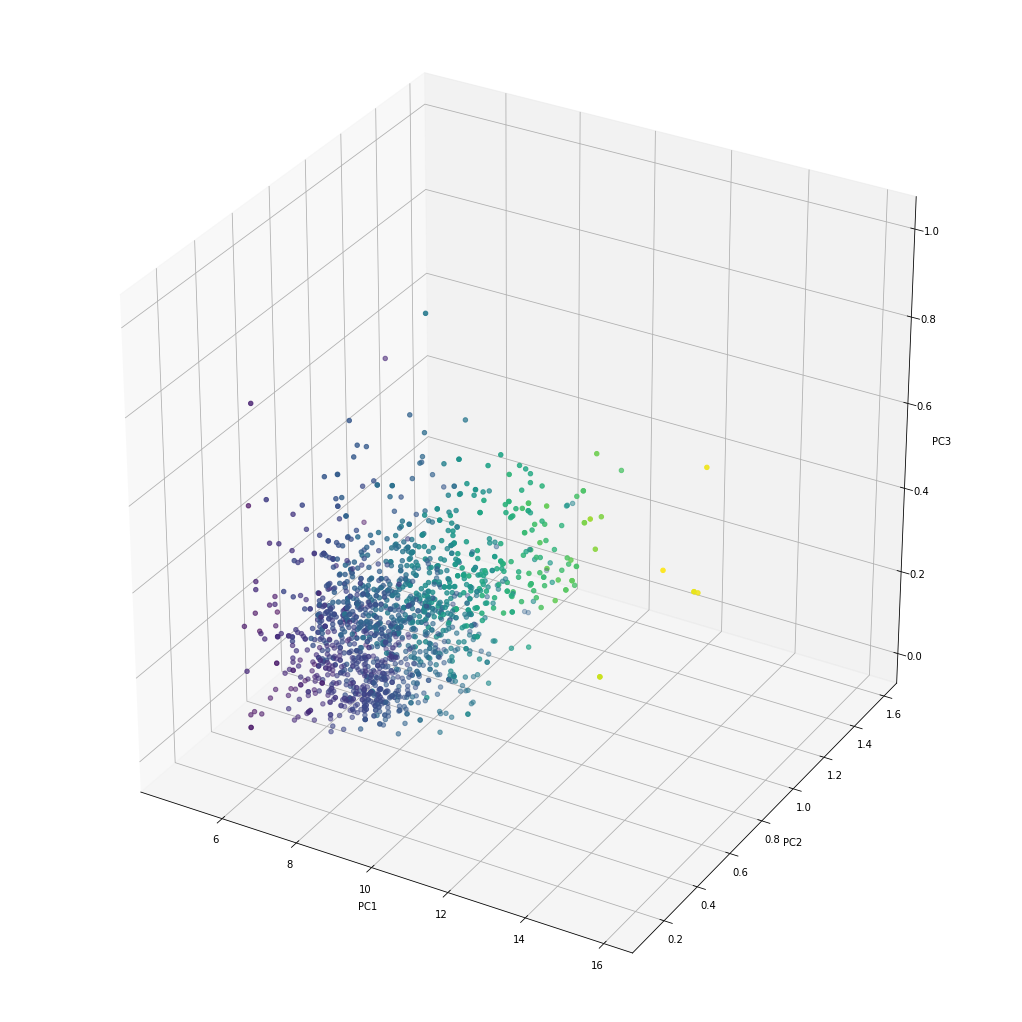

In [16]:
fig = pyplot.figure(figsize=(14,14))
ax = Axes3D(fig)

ax.scatter(df[:, 0], df[:, 1], df[:, 2], c=list(df[:, 0]))
pyplot.grid()
ax.set_xlabel("PC1")
ax.set_ylabel("PC2")
ax.set_zlabel("PC3")
pyplot.show()

In [20]:
#主成分分析の実行
#pca = PCA(n_components=2)
#pca.fit(dfs)
pca = PCA(n_components=3).fit(dfs)
dfs = pca.transform(dfs)
print(dfs)

[[-0.06226043 -0.0293121  -0.00242508]
 [-0.2193912   0.03026089  0.0033123 ]
 [-0.17991885 -0.05794352 -0.00357798]
 ...
 [-0.08238251  0.27238643 -0.01537839]
 [-0.12463761  0.28114003 -0.00849609]
 [-0.10495153  0.06640192 -0.03869012]]


In [21]:
print(pca.explained_variance_ratio_)

[0.75725724 0.18160543 0.02657549]


In [22]:
print(pca.components_)

[[ 0.48449182  0.02625397  0.01755007  0.13012392  0.00433397 -0.04589031
  -0.50135774  0.05343004  0.17589504  0.03343681  0.59798215  0.31836987]
 [-0.13056439 -0.00156663 -0.01083291 -0.03069518 -0.00121341  0.96060215
  -0.2426979  -0.00423402 -0.00638665 -0.00286383 -0.01153241 -0.00554871]
 [ 0.838773   -0.03616852  0.06630953 -0.04907813  0.00149942  0.12728184
   0.08536878 -0.01705897 -0.12499613  0.00537101 -0.48262329 -0.12643659]]


## 標準化あり

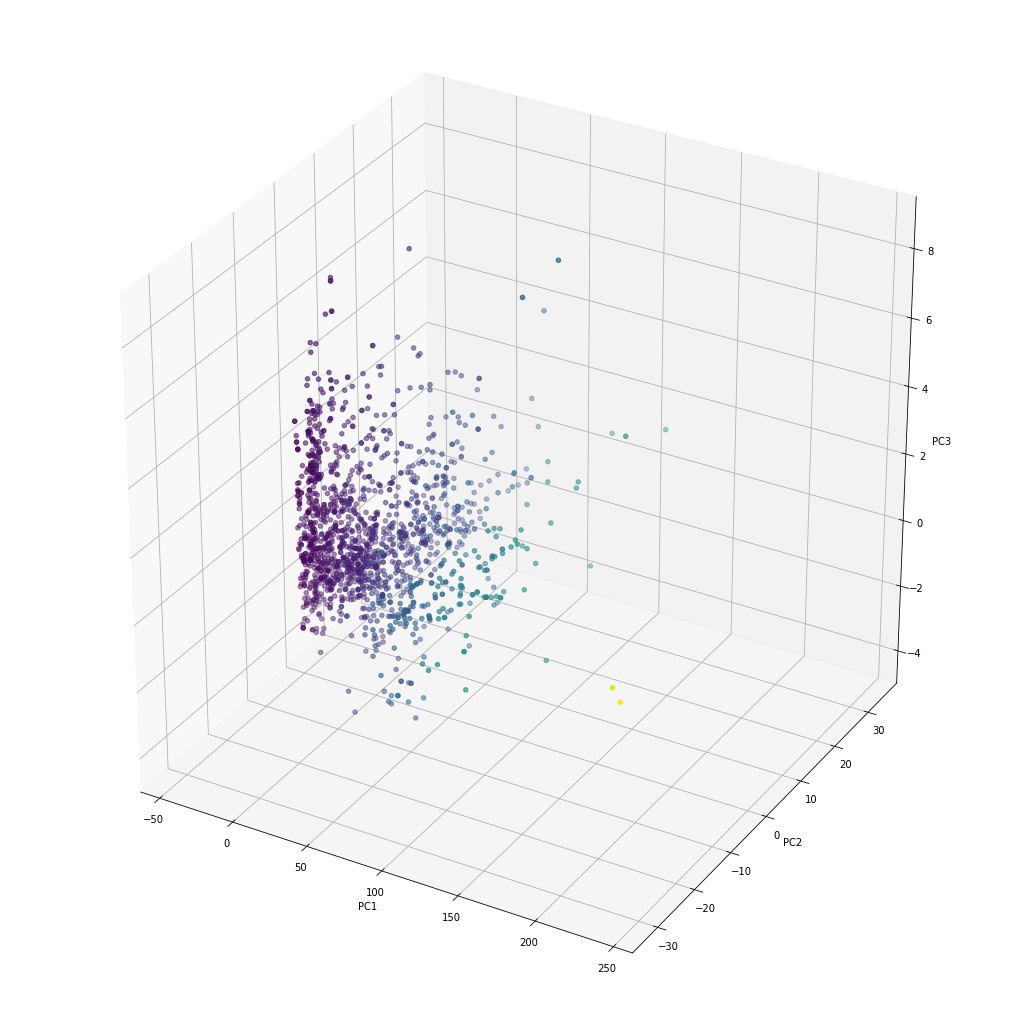

In [18]:
fig = pyplot.figure(figsize=(14,14))
ax = Axes3D(fig)

ax.scatter(dfs[:, 0], dfs[:, 1], dfs[:, 2], c=list(dfs[:, 0]))
pyplot.grid()
ax.set_xlabel("PC1")
ax.set_ylabel("PC2")
ax.set_zlabel("PC3")
pyplot.show()